# <span style="color:maroon">**Forecasting Using ARIMA Models in Python**</span>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## <span style="color:darkblue">**ARMA Models**</span>

#### <span style="color:darkred">**Explore the data and see if you can quickly glimpse whether the data is stationary or not...**</span>

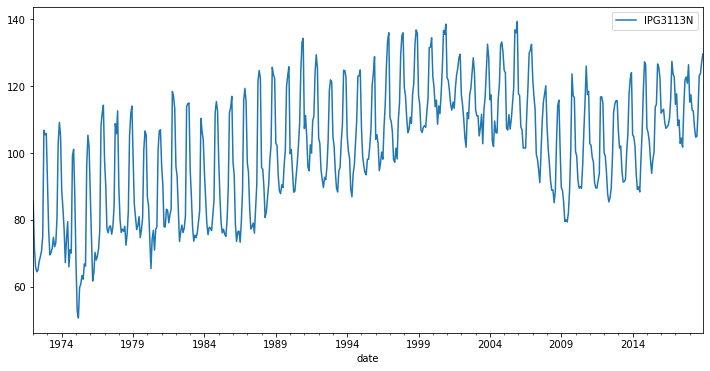

In [2]:
candy = pd.read_csv("./data/candy_production.csv", index_col="date", parse_dates=True)
candy.plot(figsize=(12,6))
plt.show()

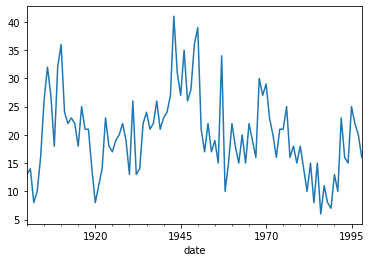

In [3]:
quakes = pd.read_csv("./data/earthquakes.csv", index_col="date", parse_dates=True)
quakes = quakes[["earthquakes_per_year"]]
quakes["earthquakes_per_year"].plot()
plt.show()

#### <span style="color:darkred">**Use the Augmented Dickey-Fuller test to more rigorously test whether the data is stationary...**</span>

In [4]:
candy_adf = adfuller(candy["IPG3113N"])
print("Augmented Dickey-Fuller Test on dataset: candy \n \n", candy_adf, "\n \n")

quakes_adf = adfuller(quakes["earthquakes_per_year"])
print("Augmented Dickey-Fuller Test on dataset: quakes \n \n", quakes_adf)

Augmented Dickey-Fuller Test on dataset: candy 
 
 (-1.7760153075016125, 0.3924327500713993, 14, 549, {'1%': -3.4423174665535385, '5%': -2.866818952732754, '10%': -2.569581505602171}, 3094.828881317046) 
 

Augmented Dickey-Fuller Test on dataset: quakes 
 
 (-3.1831922511917816, 0.020978425256003668, 2, 96, {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}, 549.0681467660734)


#### <span style="color:darkred">**Use differencing to attempt to make non-stationary data stationary...**</span>

In [5]:
candy_1d = candy.diff().dropna()
candy_1d_adf = adfuller(candy_1d["IPG3113N"])
print("Augmented Dickey-Fuller Test on dataset: candy with first-order difference \n \n", candy_1d_adf, "\n \n")

candy_2d = candy.diff().diff().dropna()
candy_2d_adf = adfuller(candy_2d["IPG3113N"])
print("Augmented Dickey-Fuller Test on dataset: candy with second-order difference \n \n", candy_2d_adf)

Augmented Dickey-Fuller Test on dataset: candy with first-order difference 
 
 (-6.175912489755648, 6.631549159335912e-08, 13, 549, {'1%': -3.4423174665535385, '5%': -2.866818952732754, '10%': -2.569581505602171}, 3091.312358309139) 
 

Augmented Dickey-Fuller Test on dataset: candy with second-order difference 
 
 (-7.933291228076412, 3.4667492920885748e-12, 19, 542, {'1%': -3.442472769145813, '5%': -2.8668873212324817, '10%': -2.5696179384812297}, 3114.4347498622546)


In [6]:
quakes_1d = quakes.diff().dropna()
quakes_1d_adf = adfuller(quakes_1d["earthquakes_per_year"])
print("Augmented Dickey-Fuller Test on dataset: quakes with first-order difference \n \n", quakes_1d_adf, "\n \n")

quakes_2d = quakes.diff().diff().dropna()
quakes_2d_adf = adfuller(quakes_2d["earthquakes_per_year"])
print("Augmented Dickey-Fuller Test on dataset: quakes with first-order difference \n \n", quakes_2d_adf)

Augmented Dickey-Fuller Test on dataset: quakes with first-order difference 
 
 (-10.827211879809571, 1.7445517772027123e-19, 1, 96, {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}, 548.5201325798578) 
 

Augmented Dickey-Fuller Test on dataset: quakes with first-order difference 
 
 (-6.733946582357212, 3.2430485126570076e-09, 7, 89, {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}, 554.04028289898)


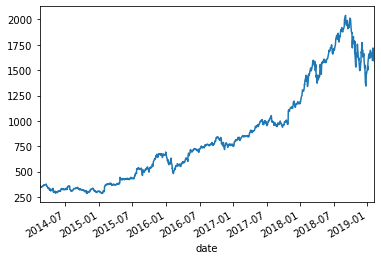

In [7]:
amazon = pd.read_csv("./data/amazon_close.csv", index_col="date", parse_dates=True).sort_index(ascending=True)
amazon["close"].plot()
plt.show()

In [8]:
amazon_adf = adfuller(amazon["close"])
print("Augmented Dickey-Fuller Test on dataset: amazon \n \n", amazon_adf)

Augmented Dickey-Fuller Test on dataset: amazon 
 
 (-0.1072478461312716, 0.9487118177265276, 23, 1235, {'1%': -3.4356560275160835, '5%': -2.8638831211270817, '10%': -2.568017509711682}, 10873.2983089527)


In [9]:
amazon_1d = amazon.diff().dropna()
amazon_1d_adf = adfuller(amazon_1d["close"])
print("Augmented Dickey-Fuller Test on dataset: amazon with first-order difference \n \n", amazon_1d_adf, "\n \n")

amazon_2d = amazon.diff().diff().dropna()
amazon_2d_adf = adfuller(amazon_2d["close"])
print("Augmented Dickey-Fuller Test on dataset: amazon with second-order difference \n \n", amazon_2d_adf)

Augmented Dickey-Fuller Test on dataset: amazon with first-order difference 
 
 (-7.201108938057448, 2.3642150138959034e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10862.499714083922) 
 

Augmented Dickey-Fuller Test on dataset: amazon with second-order difference 
 
 (-13.93864618842372, 4.9378994120685294e-26, 21, 1235, {'1%': -3.4356560275160835, '5%': -2.8638831211270817, '10%': -2.568017509711682}, 10902.569994016692)


#### <span style="color:darkred">**Use other transformation techniques to make non-stationary data stationary...**</span>

In [10]:
amazon_log_ret = np.log(amazon/amazon.shift(1)).dropna()
amazon_log_ret_adf = adfuller(amazon_log_ret["close"])
print(amazon_log_ret_adf)

(-34.89271946782062, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6221.259222090162)


#### <span style="color:darkred">**Generating randomized ARMA data can be useful for testing purposes...**</span>

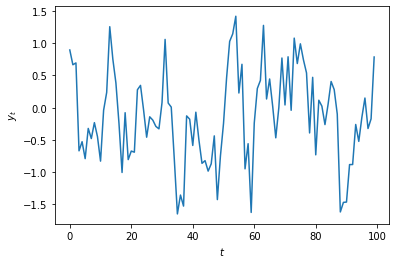

In [11]:
np.random.seed(3)

ar_coefs = [1, -0.2]
ma_coefs = [1, 0.3, 0.5]

y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

## <span style="color:darkblue">**Fitting the Future**</span>

#### <span style="color:darkred">**Using the ARMA Class to fit an ARMA and an ARMAZX model...**</span>

In [12]:
model = ARMA(y, order=(1, 1))
results = model.fit()
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 1)   Log Likelihood                 -86.290
Method:                       css-mle   S.D. of innovations              0.572
Date:                Thu, 02 Jan 2020   AIC                            180.580
Time:                        17:51:33   BIC                            191.000
Sample:                             0   HQIC                           184.797
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1023      0.148     -0.690      0.492      -0.393       0.188
ar.L1.y        0.6537      0.103      6.368      0.000       0.453       0.855
ma.L1.y       -0.0900      0.112     -0.806      0.4

`model = ARMA(hospital["wait_times_hrs"], (2,1), endog=hospital["nurse_count"])`

#### <span style="color:darkred">**Using the SARIMAX Class as a more flexible implementation of the basic ARMA model...**</span>

In [13]:
model = SARIMAX(amazon, order=(3, 1, 3))
results = model.fit()
print(results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                           Statespace Model Results                           
Dep. Variable:                  close   No. Observations:                 1259
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -5529.566
Date:                Thu, 02 Jan 2020   AIC                          11073.132
Time:                        17:51:34   BIC                          11109.093
Sample:                             0   HQIC                         11086.646
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0539      0.044     -1.228      0.219      -0.140       0.032
ar.L2         -0.1808      0.038     -4.788      0.000      -0.255      -0.107
ar.L3         -0.8971      0.044    -20.397      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


#### <span style="color:darkred">**Using the SARIMAX Class as a more flexible implementation of the basic ARMA model...**</span>

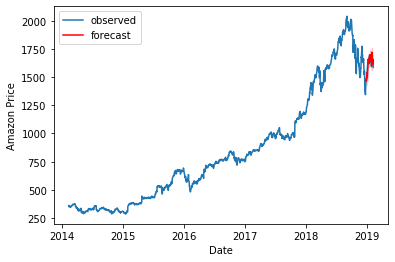

In [14]:
forec = results.get_prediction(start=-30)
forec_mean = forec.predicted_mean
forec_ci = forec.conf_int()

plt.plot(amazon.index, amazon["close"], label="observed")
plt.plot(forec_mean.index, forec_mean, color="red", label="forecast")
plt.fill_between(forec_ci.index, forec_ci["lower close"], forec_ci["upper close"], color='pink')
plt.xlabel("Date")
plt.ylabel("Amazon Price")
plt.legend()
plt.show()

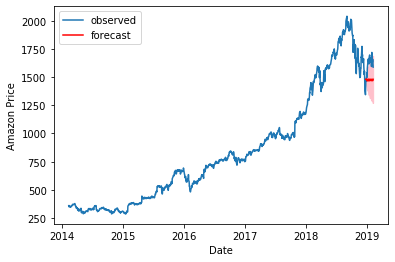

In [15]:
dyx_forec = results.get_prediction(start=-30, dynamic=True)
dyx_forec_mean = dyx_forec.predicted_mean
dyx_forec_ci = dyx_forec.conf_int()

plt.plot(amazon.index, amazon["close"], label="observed")
plt.plot(dyx_forec_mean.index, dyx_forec_mean, color="red", label="forecast")
plt.fill_between(dyx_forec_ci.index, dyx_forec_ci["lower close"], dyx_forec_ci["upper close"], color='pink')
plt.xlabel("Date")
plt.ylabel("Amazon Price")
plt.legend()
plt.show()

#### <span style="color:darkred">**Modeling stationary stock price data the hard way...**</span>

In [16]:
arma_amazon_1d = SARIMAX(amazon_1d, order=(2, 0, 2))
results_arma_amazon_1d = arma_amazon_1d.fit()
print(results_arma_amazon_1d.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5531.124
Date:                Thu, 02 Jan 2020   AIC                          11072.249
Time:                        17:51:36   BIC                          11097.935
Sample:                             0   HQIC                         11081.902
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0770      0.004    245.132      0.000       1.068       1.086
ar.L2         -0.9945      0.004   -257.201      0.000      -1.002      -0.987
ma.L1         -1.0911      0.006   -170.618      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [17]:
arma_amazon_1d_forec = results_arma_amazon_1d.get_forecast(steps=10).predicted_mean

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [18]:
arma_amazon_1d_integration_forec = np.cumsum(arma_amazon_1d_forec)

In [19]:
arma_price_forec_amazon = arma_amazon_1d_integration_forec + amazon.iloc[-1, 0]

In [20]:
arma_price_forec_amazon

1258    1593.673799
1259    1601.722519
1260    1604.967344
1261    1600.457880
1262    1592.374383
1263    1588.153001
1264    1591.645307
1265    1599.604478
1266    1604.703484
1267    1602.280007
dtype: float64

#### <span style="color:darkred">**Modeling stationary stock price data the easy way...**</span>

In [21]:
arima_amazon = SARIMAX(amazon, order=(2, 1, 2))
results_arima_amazon = arima_amazon.fit()
print(results_arima_amazon.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                  close   No. Observations:                 1259
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -5531.101
Date:                Thu, 02 Jan 2020   AIC                          11072.201
Time:                        17:51:37   BIC                          11097.888
Sample:                             0   HQIC                         11081.855
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0771      0.004    260.228      0.000       1.069       1.085
ar.L2         -0.9950      0.004   -276.353      0.000      -1.002      -0.988
ma.L1         -1.0918      0.006   -178.881      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [22]:
arima_price_forec_amazon = results_arima_amazon.get_forecast(steps=10).predicted_mean

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [23]:
arima_price_forec_amazon

1259    1593.670645
1260    1601.967057
1261    1605.479644
1262    1601.008341
1263    1592.697598
1264    1588.195173
1265    1591.614617
1266    1599.777290
1267    1605.166791
1268    1602.850103
dtype: float64

## <span style="color:darkblue">**The Best of the Best Models**</span>

#### <span style="color:darkred">**Model selection grid using ACF (auto-correlation function) and PACF (partial auto-correlation function)...**</span>

###### **AR(p) --> ACF tails off and PACF cuts off after lag p**  
###### **AR(p) --> ACF cuts off after lag q and PACF tails off**  
###### **ARMA(p, q) --> ACF tails off and PACF tails off**

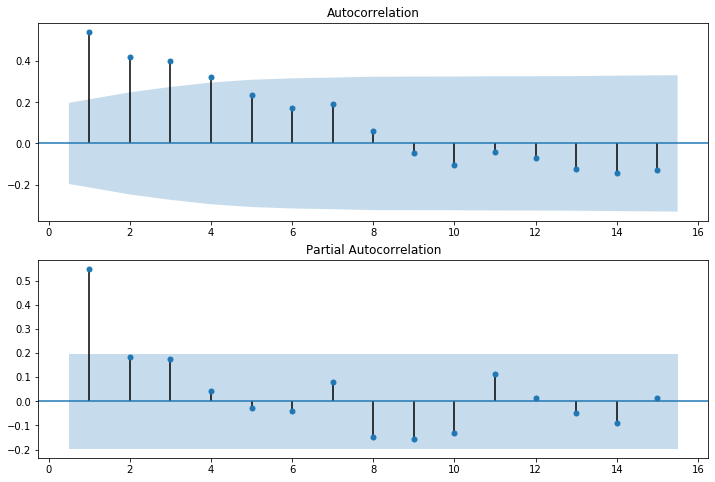

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(quakes, lags=15, zero=False, ax=ax1)
plot_pacf(quakes, lags=15, zero=False, ax=ax2)
plt.show()

#### <span style="color:darkred">**Model selection grid using AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion)...**</span>

In [25]:
order_aic_bic=[]

for p in range(3):
    for q in range(3):
        try:
            model = SARIMAX(quakes, order=(p, 0, q))
            results = model.fit()
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None))
        
models_aic_bic = pd.DataFrame(order_aic_bic, columns=("p", "q", "AIC", "BIC"))

models_aic_bic

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, Valu

,p,q,AIC,BIC
0,0,0,888.429772,891.024892
1,0,1,799.674173,804.864412
2,0,2,761.067479,768.852838
3,1,0,666.645526,671.835765
4,1,1,647.132300,654.917660
5,1,2,648.738566,659.119046
6,2,0,656.028374,663.813734
7,2,1,648.842840,659.223319
8,2,2,648.850644,661.826244


#### <span style="color:darkred">**Use model diagnostics to assess the quality of the model...**</span>

##### <span style="color:purple">**Examine the residuals and the statistics associated with the residuals...**</span>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


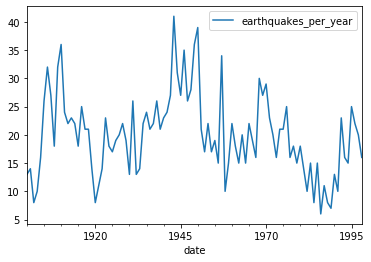

In [26]:
quake_model = SARIMAX(quakes, order=(1, 0, 1))
quake_model_results = quake_model.fit()
mae = np.mean(abs(quake_model_results.resid))

quakes.plot()
plt.show()

##### <span style="color:purple">**Low Pr(Ljung-Box) --> can not reject the null that the residuals are uncorrelated...**</span>
##### <span style="color:purple">**Low Pr(Jarque-Bera) --> can not reject the null that the residuals are Gaussian normal...**</span>

In [27]:
quake_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                            
================================================================================
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                 SARIMAX(1, 0, 1)   Log Likelihood                -320.566
Date:                  Thu, 02 Jan 2020   AIC                            647.132
Time:                          17:51:38   BIC                            654.918
Sample:                      01-01-1900   HQIC                           650.282
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9893      0.014     70.282      0.000       0.962       1.017
ma.L1         -0.5517      0.089     -6.198      0.000      -0.726      -0.377
sigma2        37.0254      4.980      7.434      0.000      27.264      46.787
===================================================================================
Ljung-Box (Q):                       32.80   Jarque-Bera (JB):                 2.76
Prob(Q):                              0.78   Prob(JB):                         0.25
Heteroskedasticity (H):               0.64   Skew:                             0.38
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### <span style="color:purple">**Use four diagnostic plots to assess model quality further...**</span>

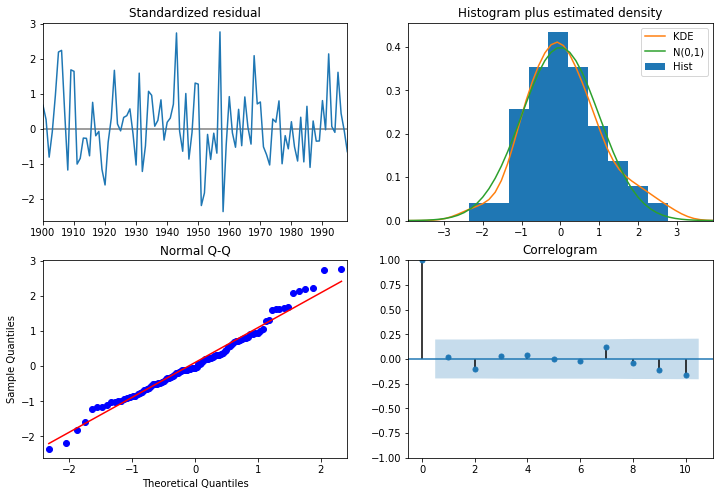

In [28]:
quake_model_results.plot_diagnostics(figsize=(12,8))
plt.show()

##### <span style="color:purple">**The Box-Jenkins Methodology**</span>  
* Identification (plotting, statistics, Augmented Dickey-Fuller test for stationarity)
* Estimation (ACF, PACF, AIC, BIC)
* Diagnostics

## <span style="color:darkblue">**Seasonal ARIMA Models**</span>

##### <span style="color:purple">**Time series consist of three parts**</span>  
* Trend
* Seasonal (ACF can be used for finding the seasonal period)
* Residual

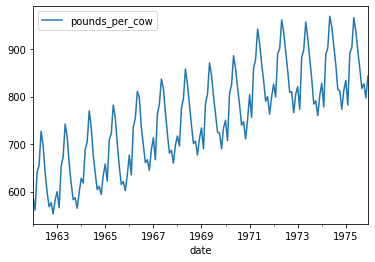

In [29]:
milk = pd.read_csv("./data/milk_production.csv", index_col="date", parse_dates=True)
milk.plot()

In [30]:
decomp_milk = seasonal_decompose(milk["pounds_per_cow"], freq=12)

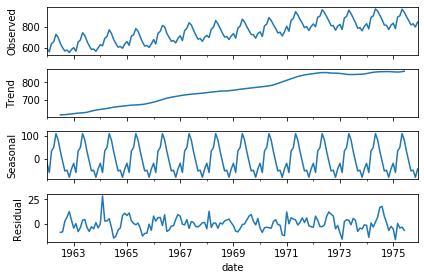

In [31]:
decomp_milk.plot()
plt.show()

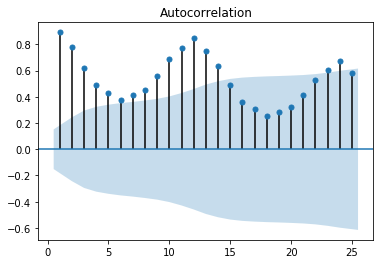

In [32]:
fig, ax1 = plt.subplots()
plot_acf(milk["pounds_per_cow"], lags=25, zero=False, ax=ax1)
plt.show()

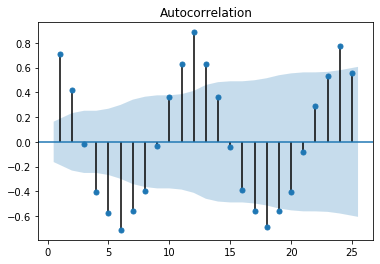

In [33]:
milk_dtr = milk["pounds_per_cow"] - milk["pounds_per_cow"].rolling(25).mean()
milk_dtr = milk_dtr.dropna()
fig, ax1 = plt.subplots()
plot_acf(milk_dtr, lags=25, zero=False, ax=ax1)
plt.show()

In [36]:
model_milk = SARIMAX(milk, order=(1,0,0), seasonal_order=(1,1,0,7))
milk_results = model_milk.fit()
milk_results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                    pounds_per_cow   No. Observations:                  168
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                -847.290
Date:                           Thu, 02 Jan 2020   AIC                           1700.580
Time:                                   17:52:16   BIC                           1709.824
Sample:                               01-01-1962   HQIC                          1704.334
                                    - 12-01-1975                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7305      0.067     10.942      0.000       0.600       0.861
ar.S.L7       -0.6746      0.090     -7.504      0.000      -0.851      -0.498
sigma2      2122.9079    281.662      7.537      0.000    1570.860    2674.956
===================================================================================
Ljung-Box (Q):                      599.21   Jarque-Bera (JB):                 3.06
Prob(Q):                              0.00   Prob(JB):                         0.22
Heteroskedasticity (H):               1.04   Skew:                             0.22
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""